In [101]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
p

NameError: name 'p' is not defined

In [ ]:
train_features = pd.read_csv('/kaggle/input/dacfindit/train.csv')
train_labels = pd.read_csv('/kaggle/input/dacfindit/target.csv')
test_features = pd.read_csv('/kaggle/input/dacfindit/test.csv')
train_features.columns = train_features.columns.str.replace(r'[{}"\':,]', '_', regex=True)
test_features.columns = test_features.columns.str.replace(r'[{}"\':,]', '_', regex=True)

In [102]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   primaryGenreName                      7000 non-null   int64  
 1   appDescriptionBrandSafetyRating       7000 non-null   int64  
 2   isCorporateEmailScore                 7000 non-null   float64
 3   userRatingCount                       7000 non-null   int64  
 4   appAge                                7000 non-null   float64
 5   averageUserRating                     7000 non-null   float64
 6   deviceType                            7000 non-null   int64  
 7   downloads                             7000 non-null   float64
 8   genre_MIN_app_appAge                  7000 non-null   float64
 9   content_rating_COUNT_app              7000 non-null   int64  
 10  genre_MAX_app_countryCode             7000 non-null   int64  
 11  genre_MIN_app_isCorpor

In [103]:
train_features['downloads'].unique()

array([3.00000000e+03, 7.50000000e+01, 7.50000000e+07, 2.53446470e+06,
       3.00000000e+00, 3.00000000e+02, 4.97900442e+03, 3.00000000e+04,
       7.50000000e+04, 3.00000000e+01, 5.00270775e+03, 7.50000000e+00,
       3.00000000e+05, 3.61153694e+03, 7.50000000e+03, 7.50000000e+02,
       3.00000000e+06, 3.08783378e+04, 9.14104478e+02, 5.01325368e+02,
       7.42100543e+02, 5.00000000e-01, 3.00000000e+07, 1.87328254e+04,
       7.50000000e+05, 8.54142857e+02, 6.38235000e+03, 1.00000000e+00,
       7.50000000e+06, 5.50000000e+00, 2.28233438e+05, 3.00000000e+08,
       1.25000000e+10, 2.50500000e+02, 7.50000000e+08, 3.00000000e+09,
       2.55000000e+01])

In [104]:
train_features['deviceType'].unique()

array([2, 0, 3, 1, 4])

In [105]:
# Melihat struktur data
print("Ukuran data train features:", train_features.shape)
print("Ukuran data train labels:", train_labels.shape)
print("Ukuran data test features:", test_features.shape)

Ukuran data train features: (7000, 18)
Ukuran data train labels: (7000, 1)
Ukuran data test features: (3000, 17)


In [106]:
# Melihat beberapa baris pertama dari data
train_features.describe(include='all')

,primaryGenreName,appDescriptionBrandSafetyRating,isCorporateEmailScore,userRatingCount,appAge,averageUserRating,deviceType,downloads,genre_MIN_app_appAge,content_rating_COUNT_app,genre_MAX_app_countryCode,genre_MIN_app_isCorporateEmailScore,genre_MAX_app_downloads,genre_MEAN_app_isCorporateEmailScore,genre_MIN_app_downloads,genre_MEAN_app_averageUserRating,genre_MAX_app_appAge,coppaRisk
count,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.0,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,6999.0
mean,19.676286,1.022857,45.774766,3.256274e+04,57.060729,2.573571,0.304857,7.148558e+06,1.742533,4695.208000,42.0,0.158570,1.433746e+09,45.774766,240.688429,2.573571,177.857824,0.099443
std,11.417848,0.438265,45.208963,5.501431e+05,37.038850,1.741065,0.787043,2.157044e+08,3.174419,1959.627022,0.0,2.830759,2.720831e+09,14.655445,812.986530,0.596181,19.293264,0.299277
min,0.000000,0.000000,0.000000,0.000000e+00,0.533333,0.000000,0.000000,5.000000e-01,0.533333,594.000000,42.0,0.000000,3.000000e+03,0.000000,0.500000,0.000000,25.466667,0.0
25%,11.000000,1.000000,0.000000,0.000000e+00,27.700000,0.000000,0.000000,3.000000e+02,0.633333,5652.000000,42.0,0.000000,3.000000e+06,43.501577,0.500000,2.091176,174.166667,0.0
50%,15.000000,1.000000,45.954222,1.000000e+00,52.566667,3.000000,0.000000,3.000000e+03,0.800000,5652.000000,42.0,0.000000,3.000000e+08,46.291833,0.500000,2.672854,181.400000,0.0
75%,29.250000,1.000000,99.000000,8.800000e+01,79.875000,4.000000,0.000000,3.087834e+04,1.200000,5652.000000,42.0,0.000000,3.000000e+09,55.645041,0.500000,3.148796,193.000000,0.0
max,45.000000,2.000000,99.000000,3.854334e+07,196.466667,5.000000,4.000000,1.250000e+10,36.833333,5652.000000,42.0,99.000000,1.250000e+10,99.000000,3000.000000,4.000000,196.466667,1.0


In [107]:
train_features['countryCode'].unique()

KeyError: 'countryCode'

In [ ]:
# Melihat beberapa baris pertama dari data
# test_features['appAge'] += 1.2
test_features.describe()

In [ ]:
train_features['developerCountry'].unique()

In [ ]:
# Menggunakan bitwise OR
train_features['is_not_listed'] = (
    (train_features['developerCountry'] == 'ADDRESS NOT LISTED IN PLAYSTORE') |
    (train_features['developerCountry'] == 'CANNOT IDENTIFY COUNTRY')
).astype(int)

test_features['is_not_listed'] = (
    (test_features['developerCountry'] == 'ADDRESS NOT LISTED IN PLAYSTORE') |
    (test_features['developerCountry'] == 'CANNOT IDENTIFY COUNTRY')
).astype(int)

# Nilai yang akan digabung menjadi 'unknown'
elem_to_group = [
    'CANNOT IDENTIFY COUNTRY',
    'ADDRESS NOT LISTED IN PLAYSTORE'
]

# Mengganti nilai di kolom developerCountry pada kedua DataFrame
for df in (train_features, test_features):
    df.loc[df['developerCountry'].isin(elem_to_group), 'developerCountry'] = 'unknown'

In [ ]:
train_features['is_not_listed_cc'] = (
    (train_features['countryCode'] == 'GLOBAL') 
).astype(int)

test_features['is_not_listed_cc'] = (
    (test_features['countryCode'] == 'GLOBAL')
).astype(int)


In [ ]:
high_risk_genres = ['Games', 'Education', 'Social']
train_features['is_high_risk_genre'] = train_features['primaryGenreName'].isin(high_risk_genres).astype(int)
test_features['is_high_risk_genre'] = test_features['primaryGenreName'].isin(high_risk_genres).astype(int)


In [ ]:
print("\nSampel data train labels:")
print(train_labels.head())

In [ ]:
## Penanganan Missing Values
# Mengganti string kosong dengan NaN
train_features.replace('', np.nan, inplace=True)
test_features.replace('', np.nan, inplace=True)

In [ ]:
# Memeriksa missing values
missing_percentage = train_features.isnull().mean() * 100
print("\nPersentase missing values per kolom:")
print(missing_percentage.sort_values(ascending=False))

In [ ]:
from scipy.stats import trim_mean
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

def parse_download_mid(x):
    if isinstance(x, str) and '-' in x:
        lo, hi = x.split('-')
        try:
            return (float(lo.strip()) + float(hi.strip())) / 2
        except ValueError:
            return np.nan
    return np.nan

class AdvancedImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = X.copy()
        X['Downloads_num'] = X['downloads'].apply(parse_download_mid)
        # Hitung trimmed mean pada kolom numeric
        self.downloads_stats = (
            X.groupby('primaryGenreName')['Downloads_num']
             .apply(lambda s: trim_mean(s.dropna(), 0.1))
        )
        return self

    def transform(self, X):
        X = X.copy()
        # Imputasi downloads: jika NaN → trimmed mean genre
        X['downloads'] = X.apply(
            lambda r: self.downloads_stats.get(r['primaryGenreName'], np.nan)
                      if pd.isna(parse_download_mid(r['downloads']))
                      else parse_download_mid(r['downloads']),
            axis=1
        )
        return X

# ── Cara Pakai ──
combined = pd.concat([train_features, test_features], ignore_index=True)
imputer = AdvancedImputer().fit(combined)
train_features = imputer.transform(train_features)
test_features  = imputer.transform(test_features)


In [108]:
# 2. Preprocessing helper: parse download ranges
def parse_downloads(x):
    if pd.isna(x) or not isinstance(x, str) or '-' not in x:
        return np.nan
    lo, hi = x.split('-')
    try:
        lo = int(lo.replace(",", "").strip())
        hi = int(hi.replace(",", "").strip())
        return (lo + hi) / 2
    except:
        return np.nan

# 3. Compute group priors for boolean/categorical
def compute_group_priors(df, group_cols, target_col):
    # Returns a DataFrame with group priors for True and mode for categorical
    agg_funcs = {}
    agg_funcs['prior_true'] = lambda s: s.eq(True).mean() if pd.api.types.is_bool_dtype(s) else np.nan
    agg_funcs['mode_cat'] = lambda s: s.mode().iloc[0] if len(s.dropna())>0 and not pd.api.types.is_bool_dtype(s) else np.nan
    priors = df.groupby(group_cols)[target_col].agg(**agg_funcs).reset_index()
    return priors

# 4. Imputation pipeline
def impute_features(df):
    df = df.copy()

    # Numeric conversions
    df['Downloads_num'] = df['downloads'].apply(parse_downloads)

    # averageUserRating: apps with zero ratings get neutral score, then fill remaining missing with median
    mask_zero = (df['userRatingCount'] == 0) & (df['averageUserRating'].isna())
    df.loc[mask_zero, 'averageUserRating'] = 3.0
    df['averageUserRating'] = df['averageUserRating'].fillna(df['averageUserRating'].median())

    # Other numerical fills
    df['adSpent'] = df['adSpent'].fillna(0)
    df['appAge'] = df['appAge'].fillna(df['appAge'].median())
    df['isCorporateEmailScore'] = df['isCorporateEmailScore'].fillna(df['isCorporateEmailScore'].mean())

    # Prepare grouping columns
    grp_cols = ['countryCode', 'primaryGenreName']

    # hasPrivacyLink imputation based on group prior
    pl_priors = compute_group_priors(df, grp_cols, 'hasPrivacyLink')
    df = df.merge(pl_priors, on=grp_cols, how='left')
    df['hasPrivacyLink'] = df['hasPrivacyLink'].fillna(df['prior_true'].ge(0.5))

    # hasTermsOfServiceLink imputation based on group prior
    tos_priors = compute_group_priors(df, grp_cols, 'hasTermsOfServiceLink')
    df = df.merge(tos_priors, on=grp_cols, how='left', suffixes=(None, '_tos'))
    df['hasTermsOfServiceLink'] = df['hasTermsOfServiceLink'].fillna(df['prior_true_tos'].ge(0.5))

    # hasTermsOfServiceLinkRating: rule-based then group mode
    df['hasTermsOfServiceLinkRating'] = np.where(
        df['hasTermsOfServiceLink'] == False,
        'none',
        df['hasTermsOfServiceLinkRating']
    )
    mode_tos = tos_priors.rename(columns={'mode_cat': 'mode_tos'})
    df = df.merge(mode_tos[grp_cols + ['mode_tos']], on=grp_cols, how='left')
    df['hasTermsOfServiceLinkRating'] = df['hasTermsOfServiceLinkRating'].fillna(df['mode_tos'])

    # Fallback for countries
    df['developerCountry'] = df['developerCountry'].fillna('ADDRESS NOT LISTED IN PLAYSTORE')
    df['countryCode'] = df['countryCode'].fillna('GLOBAL')

    # Drop helper columns
    help_cols = [c for c in ['prior_true','mode_cat','prior_true_tos','mode_tos', 'mode_cat_tos'] if c in df]
    df = df.drop(columns=help_cols)

    return df
train_idx = list(train_features.index)
test_idx = list(test_features.index)

# Add identifier
train_features['is_train'] = True
test_features['is_train'] = False

# Combine
all_df = pd.concat([train_features, test_features], axis=0)

# Impute on combined
all_imp = impute_features(all_df)

# Split back
train_features = all_imp[all_imp['is_train']].drop(columns=['is_train'])
test_features  = all_imp[~all_imp['is_train']].drop(columns=['is_train'])

# Reindex to original
train_features.index = train_idx
test_features.index  = test_idx

KeyError: 'adSpent'

In [ ]:
# Menghapus fitur dengan missing values lebih dari 30%
threshold = 50
high_missing_cols = missing_percentage[missing_percentage > threshold].index
print(f"\nKolom dengan missing values lebih dari {threshold}%:")
print(high_missing_cols.tolist())

In [ ]:
# Menghapus fitur dengan missing values tinggi
train_features_cleaned = train_features.drop(columns=high_missing_cols)
test_features_cleaned = test_features.drop(columns=high_missing_cols)

print("\nUkuran data train setelah menghapus kolom dengan missing values tinggi:", train_features_cleaned.shape)

In [ ]:
## Preprocessing Data
# Memeriksa missing values yang tersisa
missing_percentage_after = train_features_cleaned.isnull().mean() * 100
print("\nPersentase missing values per kolom setelah pembersihan:")
print(missing_percentage_after.sort_values(ascending=False))

In [ ]:
# 1) Gabungkan train & test untuk perhitungan
combined = pd.concat(
    [train_features_cleaned, test_features_cleaned],
    axis=0,
    ignore_index=True
)

# 2) Hitung median untuk numeric dan mode untuk categorical dari 'combined' dan simpan dalam dict agar bisa pakai ulang
median_values = {}
for col in combined.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'ID':
        median_values[col] = combined[col].median()

mode_values = {}
for col in combined.select_dtypes(include=['object', 'category']).columns:
    # .mode() bisa menghasilkan Series, ambil elemen pertama
    if col != 'ID':
        mode_values[col] = combined[col].mode()[0]

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import PowerTransformer
# train_idx = train_features.index
# test_idx = test_features.index

# # Tambahkan label untuk membedakan data pelatihan dan pengujian
# train_features['is_train'] = True
# test_features['is_train'] = False

# # Gabungkan dataset
# all_df = pd.concat([train_features, test_features], axis=0)

# # Identifikasi fitur numerik (float dan int)
# numeric_cols = ['appAge']

# # Terapkan transformasi Box-Cox
# pt = PowerTransformer(method='yeo-johnson', standardize=True)
# all_df['appAge'] = pt.fit_transform(all_df[numeric_cols])

# # Pisahkan kembali dataset berdasarkan label 'is_train'
# train_features = all_df[all_df['is_train']].drop(columns=['is_train'])
# test_features = all_df[~all_df['is_train']].drop(columns=['is_train'])

# # Kembalikan indeks asli
# train_features.index = train_idx
# test_features.index = test_idx

In [ ]:
# 3) Isi missing values di train & test
for col, med in median_values.items():
    train_features_cleaned[col].fillna(med, inplace=True)
    test_features_cleaned[col].fillna(med, inplace=True)

for col, mod in mode_values.items():
    train_features_cleaned[col].fillna(mod, inplace=True)
    test_features_cleaned[col].fillna(mod, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = train_features_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    # Gabungkan, lalu paksa jadi string
    combined = pd.concat(
        [train_features_cleaned[col], test_features_cleaned[col]],
        axis=0
    ).astype(str)

    le.fit(combined)  # kelas diambil dari 'combined' yang sudah seragam
    train_features_cleaned[col] = le.transform(train_features_cleaned[col].astype(str))
    test_features_cleaned[col]  = le.transform(test_features_cleaned[col].astype(str))

In [ ]:
train_features_cleaned.columns

In [ ]:
import pandas as pd
import numpy as np

# Assuming you've already done data preprocessing from your original code
# train_features_cleaned and test_features_cleaned are already created

# Create a manual feature engineering function
def create_manual_features(df, target_df=None):
    # Create an output dataframe
    features = pd.DataFrame(index=df.index)
    
    # Add original features that are important
    features['primaryGenreName'] = df['primaryGenreName']
    features['appDescriptionBrandSafetyRating'] = df['appDescriptionBrandSafetyRating']
    features['isCorporateEmailScore'] = df['isCorporateEmailScore']
    features['userRatingCount'] = df['userRatingCount']
    features['appAge'] = df['appAge']
    features['averageUserRating'] = df['averageUserRating']
    features['deviceType'] = df['deviceType']
    features['downloads'] = df['downloads']
    
    # 1. Create is_high_risk_genre feature (most important feature according to chart
    
    # 2. Create genre.MIN(app.appAge) feature
    genre_min_app_age = df.groupby('primaryGenreName')['appAge'].min().to_dict()
    features['genre_MIN_app_appAge'] = df['primaryGenreName'].map(genre_min_app_age)
    
    # 3. Create content_rating.COUNT(app) feature
    content_rating_counts = df.groupby('appDescriptionBrandSafetyRating').size().to_dict()
    features['content_rating_COUNT_app'] = df['appDescriptionBrandSafetyRating'].map(content_rating_counts)
    
    # 4. Create genre.MAX(app.countryCode) feature
    # For categorical data, we'll use the most common country code per genre
    genre_country_codes = df.groupby('primaryGenreName')['countryCode'].apply(
        lambda x: x.value_counts().index[0] if len(x) > 0 else None
    ).to_dict()
    features['genre_MAX_app_countryCode'] = df['primaryGenreName'].map(genre_country_codes)
    
    # 5. Create genre.MIN(app.isCorporateEmailScore) feature
    genre_min_corp_email = df.groupby('primaryGenreName')['isCorporateEmailScore'].min().to_dict()
    features['genre_MIN_app_isCorporateEmailScore'] = df['primaryGenreName'].map(genre_min_corp_email)
    
    # 6. Create genre.MAX(app.downloads) feature
    # Convert downloads to numeric first if needed
    if df['downloads'].dtype == 'object':
        df['downloads_numeric'] = df['downloads'].apply(parse_download_range)
        genre_max_downloads = df.groupby('primaryGenreName')['downloads_numeric'].max().to_dict()
    else:
        genre_max_downloads = df.groupby('primaryGenreName')['downloads'].max().to_dict()
    features['genre_MAX_app_downloads'] = df['primaryGenreName'].map(genre_max_downloads)
    
    # 7. Create genre.MEAN(app.isCorporateEmailScore) feature
    genre_mean_corp_email = df.groupby('primaryGenreName')['isCorporateEmailScore'].mean().to_dict()
    features['genre_MEAN_app_isCorporateEmailScore'] = df['primaryGenreName'].map(genre_mean_corp_email)
    
    # 8. Create genre.MIN(app.downloads) feature
    if 'downloads_numeric' in df.columns:
        genre_min_downloads = df.groupby('primaryGenreName')['downloads_numeric'].min().to_dict()
    else:
        genre_min_downloads = df.groupby('primaryGenreName')['downloads'].min().to_dict()
    features['genre_MIN_app_downloads'] = df['primaryGenreName'].map(genre_min_downloads)
    
    # 9. Create genre.MEAN(app.averageUserRating) feature
    genre_mean_rating = df.groupby('primaryGenreName')['averageUserRating'].mean().to_dict()
    features['genre_MEAN_app_averageUserRating'] = df['primaryGenreName'].map(genre_mean_rating)
    
    # 10. Create genre.MAX(app.appAge) feature
    genre_max_app_age = df.groupby('primaryGenreName')['appAge'].max().to_dict()
    features['genre_MAX_app_appAge'] = df['primaryGenreName'].map(genre_max_app_age)
    
    # Add the target if provided
    if target_df is not None:
        # Pastikan target_df['coppaRisk'] adalah Series
        coppa_series = pd.Series(
            data=target_df['coppaRisk'].values,
            index=target_df.index
        )
        
        # Reindex agar sesuai dengan df.index
        coppa_aligned = coppa_series.reindex(df.index)
        
        # Tambahkan ke features
        features['coppaRisk'] = coppa_aligned
    
    return features

# Helper function to parse download ranges
def parse_download_range(download_str):
    if pd.isna(download_str) or not isinstance(download_str, str):
        return np.nan
    
    # Handle formats like "1000 - 5000"
    if ' - ' in download_str:
        try:
            low, high = download_str.split(' - ')
            low = float(low.strip().replace(',', ''))
            high = float(high.strip().replace(',', ''))
            return (low + high) / 2
        except ValueError:
            return np.nan
    return np.nan

# Apply feature engineering to train and test data
target_df = pd.read_csv('/kaggle/input/dacfindit/target.csv', header=None, names=['coppaRisk'])
# Atau, jika nilai Boolean:
target_df['coppaRisk'] = (
    target_df['coppaRisk']
      .map({'True': 1, 'False': 0})
      .astype('Int64')   # nullable integer dtype, dukung NA
)
train_features = create_manual_features(train_features_cleaned, target_df)

# For test data, we don't have the target
test_features = create_manual_features(test_features_cleaned)

In [109]:
train_features.columns

Index(['primaryGenreName', 'appDescriptionBrandSafetyRating',
       'isCorporateEmailScore', 'userRatingCount', 'appAge',
       'averageUserRating', 'deviceType', 'downloads', 'genre_MIN_app_appAge',
       'content_rating_COUNT_app', 'genre_MAX_app_countryCode',
       'genre_MIN_app_isCorporateEmailScore', 'genre_MAX_app_downloads',
       'genre_MEAN_app_isCorporateEmailScore', 'genre_MIN_app_downloads',
       'genre_MEAN_app_averageUserRating', 'genre_MAX_app_appAge', 'coppaRisk',
       'is_train'],
      dtype='object')

In [110]:
X = train_features  # DataFrame fitur
y = train_labels.iloc[:, 0]  # Seri target (True/False)

In [111]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import numpy as np

# Inisialisasi model dengan parameter XGB yang sudah kamu pakai
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

model = XGBClassifier(**xgb_params)

# Siapkan StratifiedKFold dengan 10 split
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

roc_auc_scores = []

# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Latih model
    model.fit(X_tr, y_tr)

    # Prediksi probabilitas kelas positif
    y_val_proba = model.predict_proba(X_val)[:, 1]

    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

Fold  1 — ROC AUC: 0.8683
Fold  2 — ROC AUC: 0.8933
Fold  3 — ROC AUC: 0.8946
Fold  4 — ROC AUC: 0.9145
Fold  5 — ROC AUC: 0.8958
Fold  6 — ROC AUC: 0.8847
Fold  7 — ROC AUC: 0.8999
Fold  8 — ROC AUC: 0.8797
Fold  9 — ROC AUC: 0.8936
Fold 10 — ROC AUC: 0.8851

Mean ROC AUC over 10 folds : 0.8909 ± 0.0118


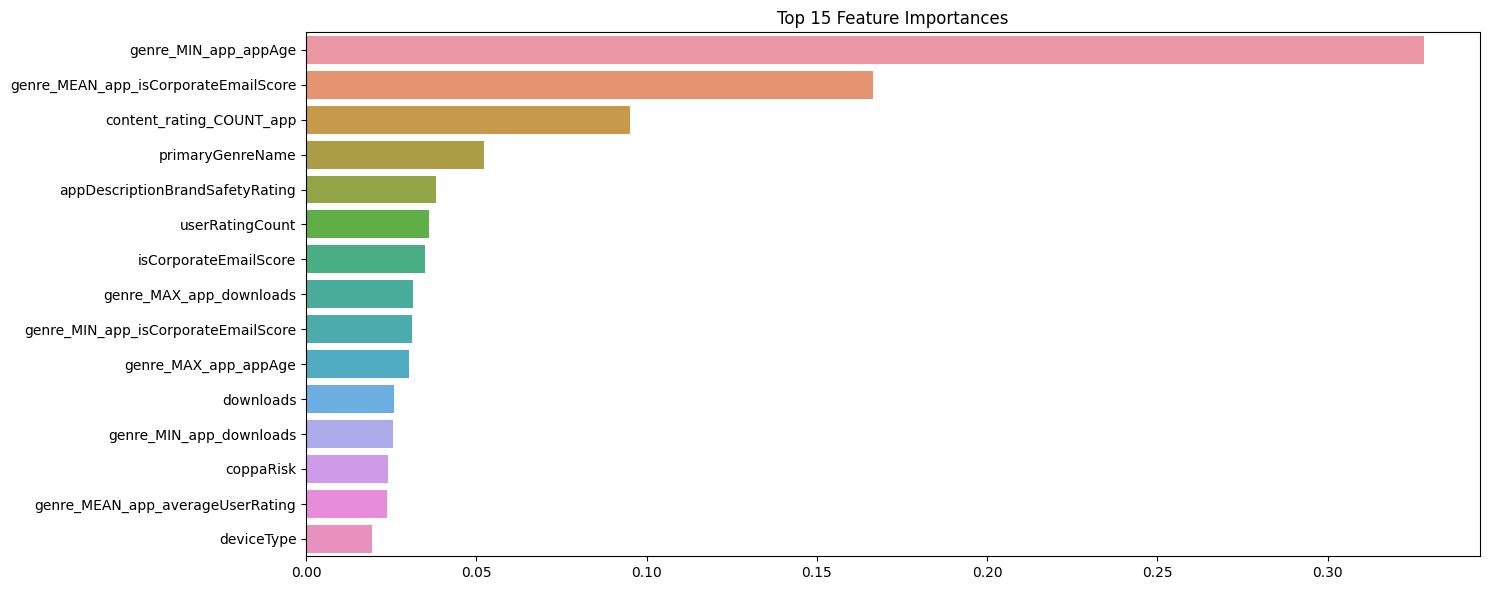

In [112]:
## Analisis Feature Importance
# Mendapatkan feature importance
feature_importance = model.feature_importances_
feature_names = X.columns

# Menampilkan feature importance
plt.figure(figsize=(15, 6))
importances = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)
sns.barplot(x=importances.values[:15], y=importances.index[:15])
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

In [113]:
train_features_cleaned.columns

Index(['developerCountry', 'countryCode', 'userRatingCount',
       'primaryGenreName', 'downloads', 'deviceType', 'hasPrivacyLink',
       'isCorporateEmailScore', 'appAge', 'averageUserRating',
       'appDescriptionBrandSafetyRating', 'mfaRating', 'is_not_listed',
       'is_not_listed_cc', 'is_high_risk_genre', 'ID', 'Downloads_num'],
      dtype='object')

In [114]:
## Prediksi dan Pembuatan File Submission

# Prediksi pada data test
if 'ID' in test_features_cleaned.columns:
    id_test = test_features_cleaned['ID']
    test_features_cleaned = test_features_cleaned.drop(columns=['ID'])
test_predictions_proba = model.predict_proba(test_features_cleaned)[:, 1]
test_predictions = model.predict(test_features_cleaned)

# Mengonversi prediksi boolean ke string untuk format submission
test_predictions_str = ["True" if pred else "False" for pred in test_predictions]

# Membuat submission file
submission = pd.DataFrame({
    'ID': id_test,
    'coppaRisk': test_predictions_proba
})

# Melihat format submission
print("\nFormat submission:")
print(submission.head())

submission.to_csv('submission.csv', index=False)

print("\nFile submission telah dibuat.")

ValueError: feature_names mismatch: ['primaryGenreName', 'appDescriptionBrandSafetyRating', 'isCorporateEmailScore', 'userRatingCount', 'appAge', 'averageUserRating', 'deviceType', 'downloads', 'genre_MIN_app_appAge', 'content_rating_COUNT_app', 'genre_MAX_app_countryCode', 'genre_MIN_app_isCorporateEmailScore', 'genre_MAX_app_downloads', 'genre_MEAN_app_isCorporateEmailScore', 'genre_MIN_app_downloads', 'genre_MEAN_app_averageUserRating', 'genre_MAX_app_appAge', 'coppaRisk', 'is_train'] ['developerCountry', 'countryCode', 'userRatingCount', 'primaryGenreName', 'downloads', 'deviceType', 'hasPrivacyLink', 'isCorporateEmailScore', 'appAge', 'averageUserRating', 'appDescriptionBrandSafetyRating', 'mfaRating', 'is_not_listed', 'is_not_listed_cc', 'is_high_risk_genre', 'Downloads_num']
expected genre_MIN_app_downloads, is_train, genre_MAX_app_downloads, coppaRisk, content_rating_COUNT_app, genre_MIN_app_isCorporateEmailScore, genre_MEAN_app_isCorporateEmailScore, genre_MIN_app_appAge, genre_MAX_app_countryCode, genre_MEAN_app_averageUserRating, genre_MAX_app_appAge in input data
training data did not have the following fields: hasPrivacyLink, developerCountry, Downloads_num, is_not_listed_cc, mfaRating, is_high_risk_genre, is_not_listed, countryCode

In [ ]:
print(model.feature_names_in_)  # fitur yang dipakai saat training
print(test_features_cleaned.columns)  # fitur yang dipakai saat prediksi